In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import random,math
from sklearn import preprocessing
from sklearn.cluster import KMeans
import pandas as pd
from sklearn import cluster

%matplotlib inline


In [2]:
dataFaith = pd.read_csv('faithful.csv')

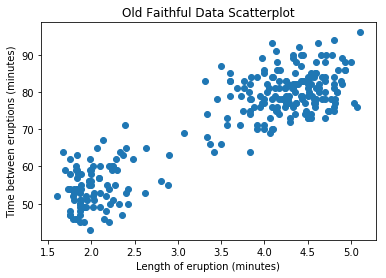

In [3]:
#https://www.springboard.com/blog/data-mining-python-tutorial/
plt.scatter(dataFaith.eruptions, dataFaith.waiting)
plt.title('Old Faithful Data Scatterplot')
plt.xlabel('Length of eruption (minutes)')
plt.ylabel('Time between eruptions (minutes)')

In [4]:
data = np.array(dataFaith)

In [5]:
def initiation(X, centroid, K, N, D):
    mean = centroid;
    pai = np.zeros([1, K]) 
    sigma = np.zeros([D, D, K]) 

    distanceMatrix = np.tile(np.sum(X * X, axis=1),(K, 1)).T + np.tile(np.sum(mean * mean, axis = 1).T,(N,1)) - 2 * np.dot(X, mean.T)
    
    labels = np.argmin(distanceMatrix,axis=1)
    for k in range(K):
        Xk = X[labels==k]
        pai[0][k] = float(np.shape(Xk)[0]) / N 
        sigma[:,:,k] = np.cov(Xk.T)
    return mean, pai, sigma


In [6]:
def initiationKmeans(X, yprediction, K, N, D):
    mean = np.zeros([K, 2])
    pai = np.zeros([1, K]) 
    sigma = np.zeros([D, D, K]) 
    
    for k in range(K):
        Xk = X[yprediction == k]     
        mean[k,:] = np.mean(X[yprediction == k],axis=0)
        pai[0][k] = float(np.shape(Xk)[0]) / N 
        sigma[:,:,k] = np.cov(Xk.T)
        
    return mean, pai, sigma

In [7]:
def gmmEM(X,K):
    N, D = np.shape(X)
    
    centroid_i = random.sample(range(272), 2) 
    centroid = X[centroid_i] 
    meanVec1 = []
    meanVec2 = [] 
    meanVec1.append(centroid[0])
    meanVec2.append(centroid[1])
    
    [mean, pai, sigma] = initiation(X, centroid, K, N, D) # Use this for EM algorithm
    #yprediction = KMeans(n_clusters = K, random_state = 150).fit_predict(X)  
    #[mean, pai, sigma] = initiationKmeans(X, yprediction, K, N, D) #Use this for K-means initialization

    threshold  = 1e-16
    L1 = -np.inf
    
    while True:
        
        #E step
        chance = probability(mean, sigma, X, K, N, D)
        gamma = chance * np.tile(pai,(N,1))
        gamma = gamma / np.tile((np.sum(gamma,axis=1)),(K,1)).T
        
        #M Step
        Mstep = np.sum(gamma,axis=0)
        mean = np.dot(np.dot(np.diag(1 / Mstep), gamma.T), X)
        meanVec1.append(mean[0])
        meanVec2.append(mean[1])
        
        pai = Mstep / N
        
        for n in range(K):
            Xshift = X - np.tile(mean[n],(N,1))
            sigma[:,:,n] = (np.dot(np.dot(Xshift.T,np.diag(gamma[:,n])),Xshift)) / Nk[n]
        
        #Converging
        L = np.sum(np.log(chance*(pai.T)))  
        if L - L1 < threshold:
            break        
        L1 = L
        
    return chance, meanVec1, meanVec2

In [8]:
def probability(mean, sigma, X, K, N, D):
    chance = np.zeros((N,K))
    for k in range(K):
        Xshift = X - np.tile(mean[k],(N,1))
        invertSigma = np.linalg.pinv(sigma[:,:,k]) 
        tmp = np.sum(np.dot(Xshift, invertSigma) * Xshift,axis=1)
        coef = (2*np.pi)**(-D/2) * np.sqrt(np.linalg.det(invertSigma))
        chance[:,k] = coef * np.exp(-0.5 * tmp)
    return chance

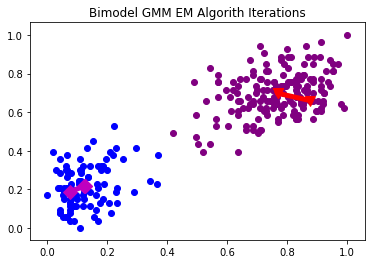

In [9]:
DAG = data[:,[0,1]] 
scaler = preprocessing.MinMaxScaler()
DAG = scaler.fit_transform(DAG) 
    
approxi, vec1, vec2 = gmmEM(DAG,2) 
index = np.argmax(approxi, axis=1) 
    
plt.scatter(DAG[index==0][:,0], DAG[index==0][:,1],c='purple')
plt.scatter(DAG[index==1][:,0], DAG[index==1][:,1],c='blue')
    
plt.plot(np.mat(vec1)[:,0],np.mat(vec1)[:,1],'rv-',markersize=5, linewidth=3)
plt.plot(np.mat(vec2)[:,0],np.mat(vec2)[:,1],'mD-',markersize=5, linewidth=3)
    
plt.title("Bimodel GMM EM Algorith Iterations")

(array([ 28.,   2.,   2.,   6.,   6.,   0.,   1.,   0.,   1.,   4.]),
 array([  3. ,   5.7,   8.4,  11.1,  13.8,  16.5,  19.2,  21.9,  24.6,
         27.3,  30. ]),
 <a list of 10 Patch objects>)

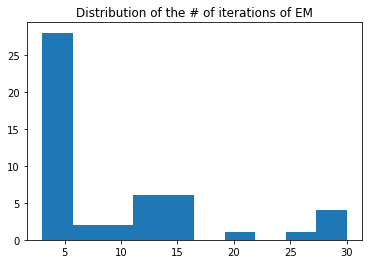

In [10]:
bucket = []
for i in range(50):
    approxi, vec1, vec2 = gmmEM(DAG,2)
    num_it.append(np.mat(vec1).shape[0])
  
plt.title("Distribution of the # of iterations of EM")
plt.hist(bucket)

In [11]:
k = 2
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(dataFaith)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [12]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

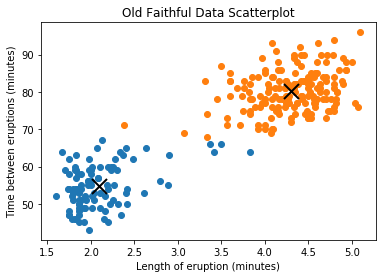

In [13]:
#http://fromdatawithlove.thegovans.us/2013/05/clustering-using-scikit-learn.html
for i in range(k):
    ds = dataFaith.iloc[np.where(labels==i)]
    plt.plot(ds.iloc[:,0],ds.iloc[:,1],'o')    
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    plt.setp(lines,ms=15.0)
    plt.setp(lines,mew=2.0)
    plt.title('Old Faithful Data Scatterplot')
    plt.xlabel('Length of eruption (minutes)')
    plt.ylabel('Time between eruptions (minutes)')
plt.show()

(array([ 31.,   3.,   1.,   1.,   3.,   2.,   0.,   0.,   2.,   7.]),
 array([  3. ,   5.7,   8.4,  11.1,  13.8,  16.5,  19.2,  21.9,  24.6,
         27.3,  30. ]),
 <a list of 10 Patch objects>)

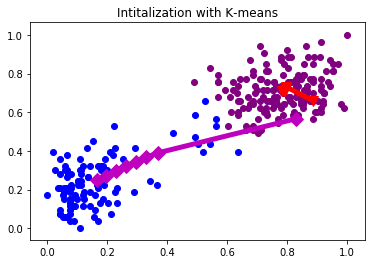

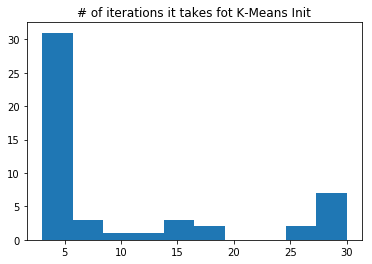

In [14]:
approxi, vec1, vec2 = gmmEM(DAG, 2)
index = np.argmax(approxi,axis=1)
plt.figure(1)
plt.scatter(DAG[index==0][:,0],DAG[index==0][:,1],c='purple')
plt.scatter(DAG[index==1][:,0],DAG[index==1][:,1],c='blue')   
plt.title("Intitalization with K-means")
     
plt.plot(np.mat(vec1)[:,0], np.mat(vec1)[:,1], 'rv-',markersize=5, linewidth=3)
plt.plot(np.mat(vec2)[:,0], np.mat(vec2)[:,1], 'mD-',markersize=5, linewidth=3)   
     
bucket = []   

for i in range(50):
    approxi, vec1, vec2 = gmmEM(DAG, 2)
    num_it.append(np.mat(vec1).shape[0])
  

plt.figure(2)
plt.title("# of iterations it takes fot K-Means Init")
plt.hist(bucket)